In [1]:
# ======================================================
# CLASIFICADOR LINEAL — PERCEPTRÓN
# Autor: Carlos Iván Sainz Torres
# Materia: Clasificación Inteligente de Datos
# ======================================================

# ======================================================
# 1. FUNDAMENTOS DE LA TÉCNICA
# ======================================================
# El Perceptrón fue propuesto por Frank Rosenblatt (1958)
# y es el modelo base de las redes neuronales.
# Busca clasificar ejemplos en dos clases (0 y 1)
# separando los datos mediante una frontera lineal.

In [2]:
# ======================================================
# 2. IMPORTACIÓN DE LIBRERÍAS
# ======================================================
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

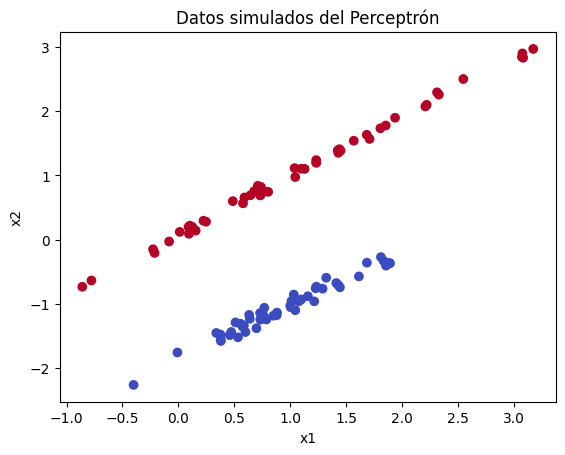

In [3]:
# ======================================================
# 3. FEATURE ENGINEERING
# ======================================================
# Generamos un conjunto de datos artificial con 2 características (x1, x2)
# y dos clases (0 y 1) para visualizar la frontera de decisión.

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

#Visualizacion de los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Datos simulados del Perceptrón")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [4]:
# ======================================================
# 4. MODEL TRAINING
# ======================================================
# Dividimos el conjunto de datos en entrenamiento y prueba.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

modelo = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
modelo.fit(X_train, y_train)

print("Entrenamiento completado")

Entrenamiento completado


In [5]:
# ======================================================
# 5. PREDICTION
# ======================================================
# Definimos una función para probar nuevos patrones de entrada.

def probar_patron(modelo, patron):
    pred = modelo.predict([patron])
    print(f"Patrón {patron} → Clase predicha: {pred[0]}")

#ejemplo
print("\nPruebas de patrones:")
probar_patron(modelo, [0.5, 0.8])
probar_patron(modelo, [-1.5, -0.2])


Pruebas de patrones:
Patrón [0.5, 0.8] → Clase predicha: 1
Patrón [-1.5, -0.2] → Clase predicha: 1



Precisión del modelo: 1.00


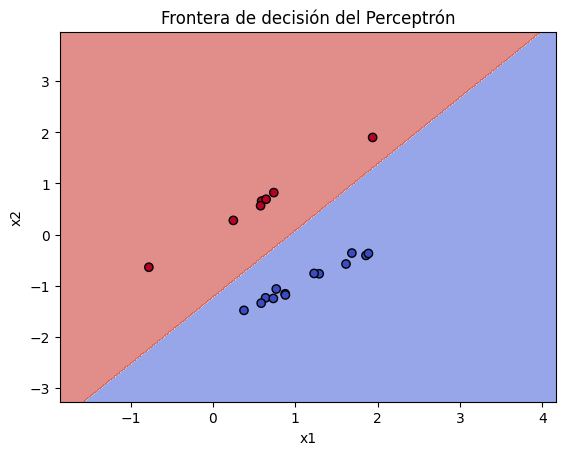

In [6]:
# ======================================================
# 6. MODEL EVALUATION
# ======================================================
# Calculamos la métrica Accuracy (exactitud del modelo).

y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {accuracy:.2f}")

#visualizacion de la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
            cmap='coolwarm', edgecolors='k')
plt.title("Frontera de decisión del Perceptrón")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()